In previous case Blue color is selectable because of:
* Even lightning
* Consistent Blue Color

*But the previous discussed color selection method will fail if any of above condition is not met*
-----------------------------------------------------------------------------------------------------------------------------------

THIS PROBLEM WILL BE SOLVED USING COLOR SPACES
*Different ColorSpaces are*
* RGB (Red, Blue, Green)
* HSV (Hue, Saturation, Value)
* HLS (Hue, Lightness, Saturation)

**HSV**  
* in this it isolates the v component, which varies most during the different lightning condition
* the H channel remains fairly consistent in shadow or excessive brightness

# Using RGB to differentiate pink ballons


Import Resouces and image

In [24]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

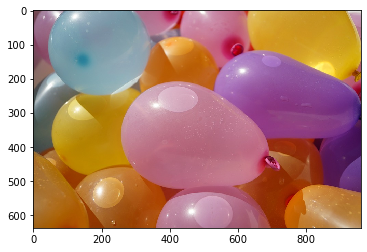

In [25]:
# Reading the image
image = cv2.imread('images/water_balloons.jpg')

# make the copy of the original image
image_copy = np.copy(image)

# convert into rgb image
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

Each pixel in this image has the (x,y) value along with intensity value

In [26]:
# RGB Channels

r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

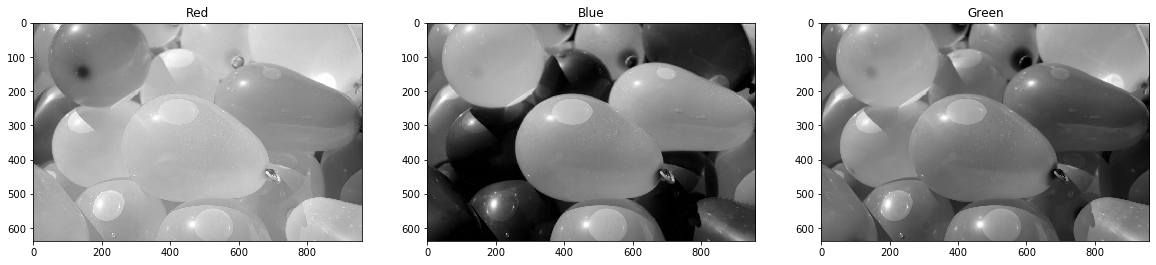

In [27]:
f, (ax1,ax2,ax3)= plt.subplots(1,3,figsize = (20,10))

ax1.set_title("Red")
ax1.imshow(r, cmap='gray')

ax2.set_title("Blue")
ax2.imshow(b,cmap='gray')

ax3.set_title("Green")
ax3.imshow(g,cmap='gray')

# Using HSV colorspace

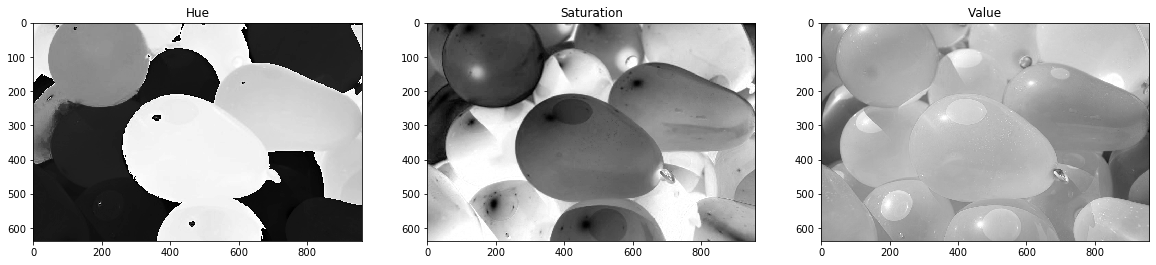

In [8]:
hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1,ax2,ax3)= plt.subplots(1,3,figsize = (20,10))

ax1.set_title("Hue")
ax1.imshow(h, cmap='gray')

ax2.set_title("Saturation")
ax2.imshow(s,cmap='gray')

ax3.set_title("Value")
ax3.imshow(v,cmap='gray')

* Threshold value for pink color Selection
* I have used the color picker for this work
* https://www.w3schools.com/colors/colors_picker.asp

In [28]:
# define upper and lower value for RGB

lower_rgb = np.array([180,0,100])
upper_rgb = np.array([255,255,230])


In [13]:
# define upper and lower value for RGB

lower_hsl = np.array([160,0,0])
upper_hsl = np.array([180,255,255])


# RGB MASK

Text(0.5, 1.0, 'RGB SELECTION')

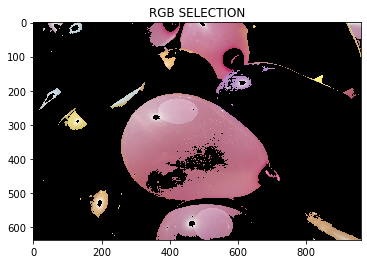

In [30]:
# creating a masked area
mask_rgb = cv2.inRange(image_copy, lower_rgb, upper_rgb)

# will create a copy of image and will mask it using masked area

masked_image = np.copy(image_copy)
masked_image[mask_rgb==0] = [0,0,0]

plt.imshow(masked_image)
plt.title('RGB SELECTION')


# HSV MASK

Text(0.5, 1.0, 'HSV Selection')

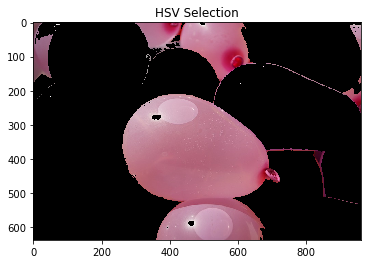

In [31]:
# hsv mask

# Defining the hsv masked area
mask_hsv = cv2.inRange(hsv,lower_hsl,upper_hsl)

# will mask the copy of the image with masked area

masked_image = np.copy(image_copy)
masked_image[mask_hsv==0] = [0,0,0]

plt.imshow(masked_image)
plt.title('HSV Selection')